# Tunisian Horses


In [8]:
import os
import pandas as pd
import re
from PIL import Image

# Set the path to the main directory containing the folders of images
main_dir = '../data/THoDBRL2015'
search_in_dir = 'Croped Images'

# Initialize a list to hold metadata
metadata = []

# Recursively walk through each folder and subfolder to collect metadata
for root, dirs, files in os.walk(main_dir):
    # 'root' is the current directory in the hierarchy
    # 'dirs' are the directories in 'root'
    # 'files' are the files in 'root'
    # basename = os.path.basename(root)
    if search_in_dir in root:
        for filename in files:
            if filename.endswith(('.png', '.jpg', '.jpeg')):  # Adjust extensions as needed
                file_path = os.path.join(root, filename)

                # Extract the folder name as the relative path from main_dir to the current folder
                relative_folder_path = os.path.relpath(root, main_dir)

                match_horse_id = re.search(r'\d+$', relative_folder_path)
                horse_id = match_horse_id.group() if match_horse_id else None  # Assign None if no match is found

                # Determine category based on filename content
                if 'Dhr' in filename: # Droit
                    camera_position_category = 'Right'
                elif 'Ghr' in filename: # Gauche
                    camera_position_category = 'Left'
                elif 'fhr' in filename: # front
                    camera_position_category = 'Front'
                else:
                    camera_position_category = 'Unknown'

                match_position = re.sub(r'\d', '', filename)
                # camera_position = match_position.group() if match_position else None

                with Image.open(main_dir + '/' + relative_folder_path + '/' + filename) as img:
                    width, height = img.size  # .size returns (width, height)

                # Determine orientation
                if width > height:
                    orientations = 'Landscape'
                elif height > width:
                    orientation = 'Portrait'
                else:
                    orientation = 'Square'


                # Add metadata: Folder path, filename, and full file path
                metadata.append({
                    'file_path': file_path,
                    'horse_id': horse_id,
                    'photo_id': re.search(r'\d+', filename).group(),
                    'folder': relative_folder_path,  # This will give the relative path of the folder structure
                    'filename': filename,
                    'format': filename.split('.')[-1],
                    'camera_position': camera_position_category,
                    'file_size': os.path.getsize(file_path),
                    'width': width,
                    'height': height,
                    'aspect_ratio': width / height,
                    'orientation': orientation,
                })

# Create DataFrame with specified dtypes
metadata_df = pd.DataFrame(metadata, dtype='object').astype({
    'file_path': 'string',
    'horse_id': 'int64',          # Assuming it's an integer
    'photo_id': 'int64',          # Assuming it's an integer
    'folder': 'string',
    'filename': 'string',
    'format': 'category',        # Categorical for file format
    'camera_position': 'category', # Categorical for camera position
    'file_size': 'int64',         # Integer for file size in bytes
    'width': 'int64',             # Integer for width
    'height': 'int64',             # Integer for height
    'aspect_ratio': 'float',
    'orientation': 'category',
})
# Convert metadata list to a DataFrame
# metadata_df = pd.DataFrame(metadata)

metadata_df.to_csv('metada_THoDBRL2015', index=False)
metadata_df

file_path  horse_id  photo_id  \
0     ../data/THoDBRL2015/Part3/Croped Images/27/Dhr...        27        10   
1     ../data/THoDBRL2015/Part3/Croped Images/27/Ghr...        27         9   
2     ../data/THoDBRL2015/Part3/Croped Images/27/Ghr...        27         8   
3     ../data/THoDBRL2015/Part3/Croped Images/27/fhr...        27        10   
4     ../data/THoDBRL2015/Part3/Croped Images/27/fhr...        27         4   
...                                                 ...       ...       ...   
1405  ../data/THoDBRL2015/Part1/Croped Images/5/Ghr5...         5         5   
1406  ../data/THoDBRL2015/Part1/Croped Images/5/Ghr4...         5         4   
1407  ../data/THoDBRL2015/Part1/Croped Images/5/Ghr1...         5         1   
1408  ../data/THoDBRL2015/Part1/Croped Images/5/Ghr3...         5         3   
1409  ../data/THoDBRL2015/Part1/Croped Images/5/Ghr2...         5         2   

                      folder   filename format camera_position  file_size  \
0     Part3/Croped Images/27  Dhr10.jpg    jpg           Right       9511   
1     Part3/Croped Images/27   Ghr9.jpg    jpg            Left      11120   
2     Part3/Croped Images/27   Ghr8.jpg    jpg            Left      11179   
3     Part3/Croped Images/27  fhr10.jpg    jpg           Front      12079   
4     Part3/Croped Images/27   fhr4.jpg    jpg           Front      13243   
...                      ...        ...    ...             ...        ...   
1405   Part1/Croped Images/5   Ghr5.jpg    jpg            Left       5733   
1406   Part1/Croped Images/5   Ghr4.jpg    jpg            Left       5970   
1407   Part1/Croped Images/5   Ghr1.jpg    jpg            Left       5965   
1408   Part1/Croped Images/5   Ghr3.jpg    jpg            Left       6122   
1409   Part1/Croped Images/5   Ghr2.jpg    jpg            Left       6154   

      width  height  aspect_ratio orientation  
0       165     260      0.634615    Portrait  
1       165     260      0.634615    Portrait  
2       165     260      0.634615    Portrait  
3       160     380      0.421053    Portrait  
4       160     380      0.421053    Portrait  
...     ...     ...           ...         ...  
1405    165     260      0.634615    Portrait  
1406    165     260      0.634615    Portrait  
1407    165     260      0.634615    Portrait  
1408    165     260      0.634615    Portrait  
1409    165     260      0.634615    Portrait  

[1410 rows x 12 columns]

In [9]:
metadata_df['horse_id'].unique()

array([27, 29, 28, 26, 21, 30, 24, 23, 22, 25, 32, 35, 34, 33, 38, 36, 31,
       37, 39, 40, 42, 45, 44, 43, 46, 41, 47, 20, 18, 11, 16, 17, 19, 15,
       12, 13, 14,  9,  7,  6,  1, 10,  8,  4,  3,  2,  5])

In [10]:
metadata_df.dtypes

file_path          string[python]
horse_id                    int64
photo_id                    int64
folder             string[python]
filename           string[python]
format                   category
camera_position          category
file_size                   int64
width                       int64
height                      int64
aspect_ratio              float64
orientation              category
dtype: object

In [11]:
metadata_df['camera_position'].unique()

['Right', 'Left', 'Front']
Categories (3, object): ['Front', 'Left', 'Right']

In [12]:
metadata_df['aspect_ratio'].unique()

array([0.63461538, 0.42105263])

In [6]:
metadata_df['orientation'].unique()

['Portrait']
Categories (1, object): ['Portrait']

In [7]:
grouped_horse_camera = metadata_df.groupby(['horse_id', 'camera_position'], observed=True)
grouped_horse_camera.size()


horse_id  camera_position
1         Front              10
          Left               10
          Right              10
2         Front              10
          Left               10
                             ..
46        Left               10
          Right              10
47        Front              10
          Left               10
          Right              10
Length: 141, dtype: int64

In [8]:
grouped_horse_camera

In [9]:
# Apply different aggregations for each column
agg_df = grouped_horse_camera.agg({
    'file_size': ['min', 'max'],
     # 'file_size': 'max'
    'aspect_ratio': 'max',
    # 'brightness': ['min', 'max']  # Min and max of brightness
})
print("Aggregated DataFrame with multiple functions:")
print(agg_df)

Aggregated DataFrame with multiple functions:
                         file_size        aspect_ratio
                               min    max          max
horse_id camera_position                              
1        Front                7644  10103     0.421053
         Left                 6526   7450     0.634615
         Right                6609   7002     0.634615
2        Front                9088  10601     0.421053
         Left                 6360   6952     0.634615
...                            ...    ...          ...
46       Left                 4724   5587     0.634615
         Right                4107   5958     0.634615
47       Front                5319   7349     0.421053
         Left                 5398   7760     0.634615
         Right                4778   5952     0.634615

[141 rows x 3 columns]


In [10]:
grouped_horse = metadata_df.groupby(['horse_id'], observed=True)
agg_horse_df = grouped_horse.agg({
    'file_size': ['min', 'max', 'mean', 'std'],
})
agg_horse_df

file_size                                  
               min    max          mean          std
horse_id                                            
1             6526  10103   7752.000000  1158.073609
2             5425  10601   7536.533333  1917.279749
3             5704  10352   7980.733333  1625.104473
4             5839   8748   7162.366667   814.105453
5             5235   8194   6497.666667  1017.035663
6             7653  12249   8914.500000  1415.320111
7             8638  10736   9158.966667   483.908689
8             8113  11392   9631.133333   974.976843
9             6784  10062   8362.666667  1113.906742
10            5821   8601   6796.266667   761.134812
11            4967   8656   6947.733333   988.305374
12            3528   6281   4963.700000   851.650614
13            5541   8722   6529.033333   887.587800
14            5734   9500   7238.566667  1345.916370
15            4917   6412   5656.866667   368.286501
16            4688   7296   5902.833333   681.689133
17            5413   9674   7081.100000  1055.988484
18            7086  11887   8907.533333  1713.023013
19            4325   6454   5411.966667   726.851998
20            5495  11185   7138.533333  1697.168143
21            5023   8368   6314.533333   985.168032
22            6282   9019   7530.666667   752.764484
23            6030  11084   8058.166667  1827.139598
24            4390   9733   6970.033333  1336.027707
25            3520   9534   6843.033333  2012.360417
26            5683   9637   6832.233333  1214.386341
27            9473  13309  10874.400000  1056.333202
28            7048  11252   8749.200000  1486.842834
29            4366   7502   5766.233333   947.082514
30            3679   7033   5693.600000   791.846842
31            5951   8344   6781.033333   677.364237
32            3641   6224   4802.066667   875.810243
33            5851   9334   6959.166667  1349.291719
34            4942   8412   6576.700000  1057.981949
35            4479   8043   5824.233333   899.575788
36            4714  10853   7595.633333  1791.043704
37            5618   8060   6999.600000   776.682938
38            5104   7192   6028.900000   708.706658
39            6159   9699   7215.333333  1082.412705
40            4246   8343   5811.433333  1092.061028
41            5656  10087   7468.333333  1130.663868
42            5177   7266   5900.500000   705.626537
43            5721   8022   6828.433333   481.601043
44            4165   6879   5741.300000   680.833523
45            3742   8499   5901.600000  1372.393143
46            4107   8023   5843.433333  1064.582084
47            4778   7760   6146.300000   821.915095

In [11]:
grouped_camera_position = metadata_df.groupby(['camera_position'], observed=True)
agg_camera_position_df = grouped_camera_position.agg({
    'file_size': ['min', 'max', 'mean', 'std'],
    'width': ['min', 'max', 'mean'],
    'height': ['min', 'max', 'mean'],
})
agg_camera_position_df

file_size                                  width              \
                      min    max         mean          std   min  max   mean   
camera_position                                                                
Front                3679  13309  8084.736170  1688.761026   160  160  160.0   
Left                 3520  11593  6551.559574  1356.432561   165  165  165.0   
Right                3641  10744  6276.053191  1337.828203   165  165  165.0   

                height              
                   min  max   mean  
camera_position                     
Front              380  380  380.0  
Left               260  260  260.0  
Right              260  260  260.0

So, all the Front images are 160x380. The Left and Right images are 165x260.

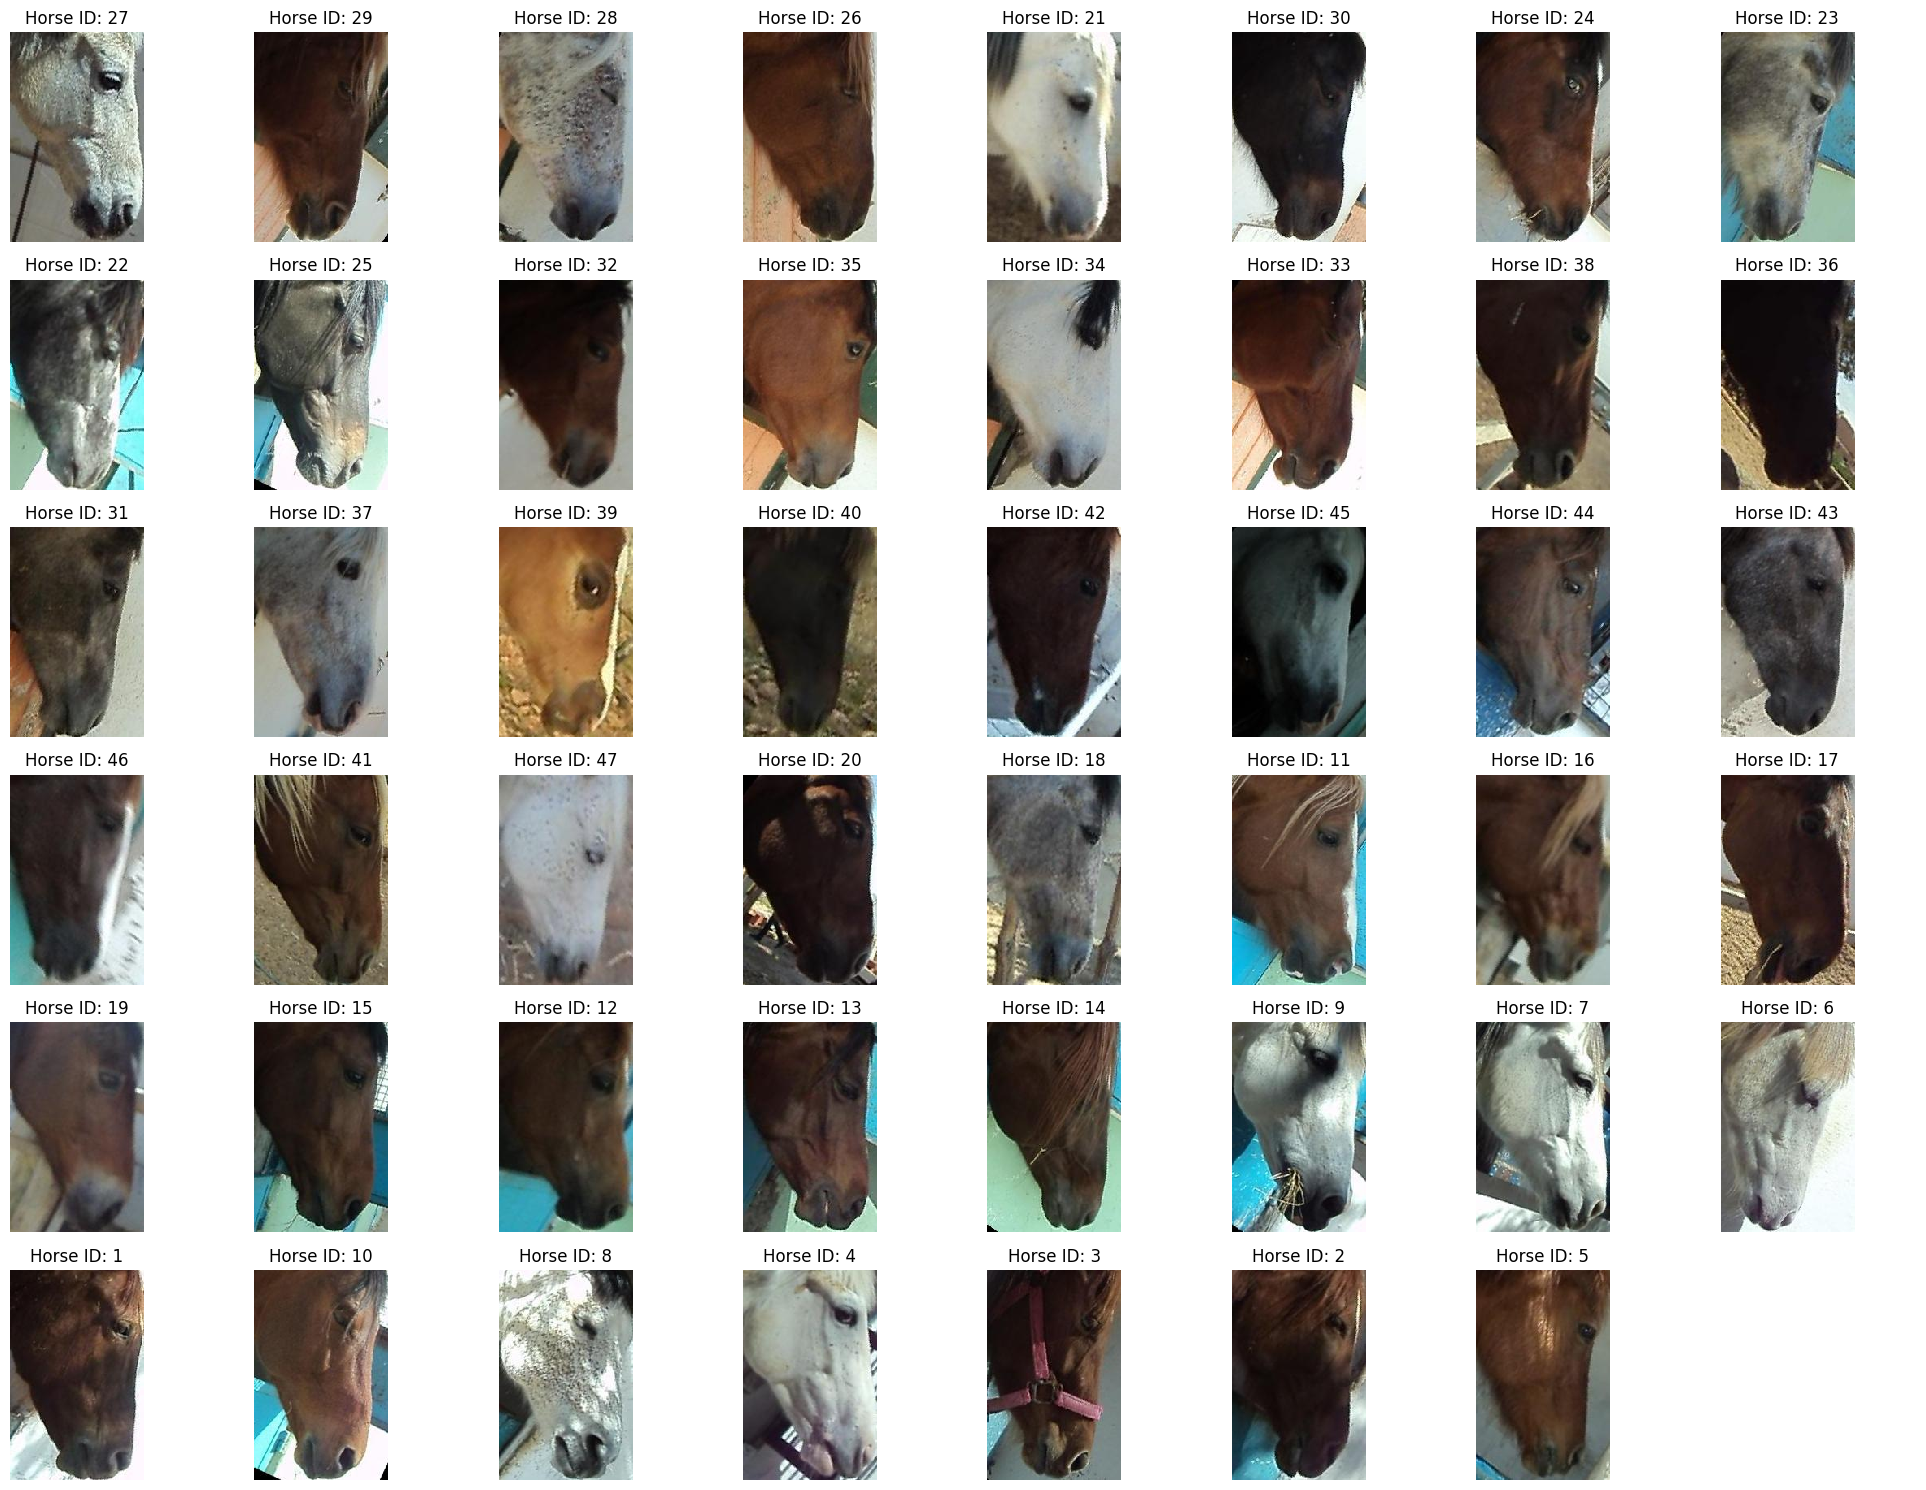

In [12]:
from matplotlib import pyplot as plt

# Retain only relevant columns for displaying images by horse ID
data = metadata_df[['horse_id', 'file_path']]


# Drop duplicates to get one image per horse
data_unique_horses = data.drop_duplicates(subset=['horse_id'])

# Set grid size to display 47 images (8 columns, 6 rows)
cols, rows = 8, 6

# Create a figure with a static grid of subplots
fig, axes = plt.subplots(rows, cols, figsize=(20, 15), dpi=100)  # Set DPI for higher resolution

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Display each selected image
for i, (idx, row) in enumerate(data_unique_horses.iterrows()):
    img_path = row['file_path']

    # Check if the file path is valid before loading
    if os.path.exists(img_path):
        img = Image.open(img_path).convert("RGB")  # Ensure RGB mode
        axes[i].imshow(img, interpolation='nearest')  # Avoid interpolation
    else:
        # Display a placeholder text if image path is invalid
        axes[i].text(0.5, 0.5, "Image Not Found", ha='center', va='center', color="red")

    # Hide axes and set title as horse ID
    axes[i].axis('off')
    axes[i].set_title(f"Horse ID: {row['horse_id']}")

# Hide any remaining empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [13]:
from sklearn.model_selection import train_test_split


In [14]:
import tensorflow.keras as keras

In [16]:
from tensorflow.keras.utils import to_categorical


In [14]:
import numpy as np
print(np.__version__)

2.0.2


In [15]:


# Dataset voorbereiden
def load_images_and_labels(metadata_df):
    images = []
    labels = []
    
    for _, row in metadata_df.iterrows():
        if os.path.exists(row['file_path']):
            img = Image.open(row['file_path']).resize((128, 128))  # Schalen naar een vast formaat
            images.append(np.array(img))
            labels.append(row['horse_id'])  # Gebruik horse_id als label
    
    images = np.array(images)
    labels = np.array(labels)
    
    return images, labels

# Laad data
images, labels = load_images_and_labels(metadata_df)

# Splitsen in train en test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Normaliseer pixelwaarden
X_train = X_train / 255.0
X_test = X_test / 255.0

# Labels omzetten naar categorische data
num_classes = len(metadata_df['horse_id'].unique())
y_train = y_train - 1  # Indien nodig de labels aanpassen
y_test = y_test - 1  # Ook testlabels aanpassen

# Labels omzetten naar categorische data
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)



NameError: name 'to_categorical' is not defined

In [19]:


print(y_train.max())  # Max label value
num_classes = len(metadata_df['horse_id'].unique())
print(num_classes)  # Controleer het aantal klassen

1.0
47


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Initialize the Sequential model
model = Sequential()

# Add layers step-by-step
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # To prevent overfitting

model.add(Dense(num_classes, activation='softmax'))  # Output layer

# Model summary
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



/Users/thijs/fontys/dasc2/HorseFace/venv_horseface/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 47)             │         6,063 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,310,703 (12.63 MB)

 Trainable params: 3,310,703 (12.63 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test)
)


Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 17s 340ms/step - accuracy: 0.0224 - loss: 3.8513 - val_accuracy: 0.0674 - val_loss: 3.5981
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 12s 328ms/step - accuracy: 0.0662 - loss: 3.5149 - val_accuracy: 0.3227 - val_loss: 2.7497
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 13s 351ms/step - accuracy: 0.2824 - loss: 2.6733 - val_accuracy: 0.6773 - val_loss: 1.4557
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 12s 323ms/step - accuracy: 0.5025 - loss: 1.7442 - val_accuracy: 0.8014 - val_loss: 0.8554
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 11s 316ms/step - accuracy: 0.6562 - loss: 1.1308 - val_accuracy: 0.9113 - val_loss: 0.4208
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 15s 410ms/step - accuracy: 0.7411 - loss: 0.8336 - val_accuracy: 0.9078 - val_loss: 0.4277
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 12s 327ms/step - accuracy: 0.7958 - loss: 0.6752 - val_accuracy: 0.9326 - val_loss: 0.2616
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 11s 292ms/step - accuracy: 0.8574 - loss: 0.4508 - val_accu

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.9444 - loss: 0.1508
Test Accuracy: 95.39%


In [ ]:
model.save('horse_identifier_cnn.h5')


In [ ]:
from tensorflow.keras.models import load_model

# Laad het model
model = load_model('horse_identifier_cnn.h5')

# Classificeer een nieuwe afbeelding
def classify_image(img_path):
    img = Image.open(img_path).resize((128, 128))
    img_array = np.array(img) / 255.0  # Normaliseren
    img_array = np.expand_dims(img_array, axis=0)  # Voeg een batch-dimensie toe
    
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    return predicted_class

new_image_path = "Testfotos Paard.jpg"
predicted_horse = classify_image(new_image_path)
print(f"Voorspelde Horse ID: {predicted_horse}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
Voorspelde Horse ID: 1


In [ ]:
# Zorg ervoor dat je testdata goed is voorbereid, net als je trainingsdata
# In dit voorbeeld wordt aangenomen dat je X_test (inputdata) en y_test (labels) hebt

# Model evalueren op de testset
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Toon de resultaten van de evaluatie
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.9444 - loss: 0.1508
Test Loss: 0.14623714983463287
Test Accuracy: 0.9539006948471069


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step


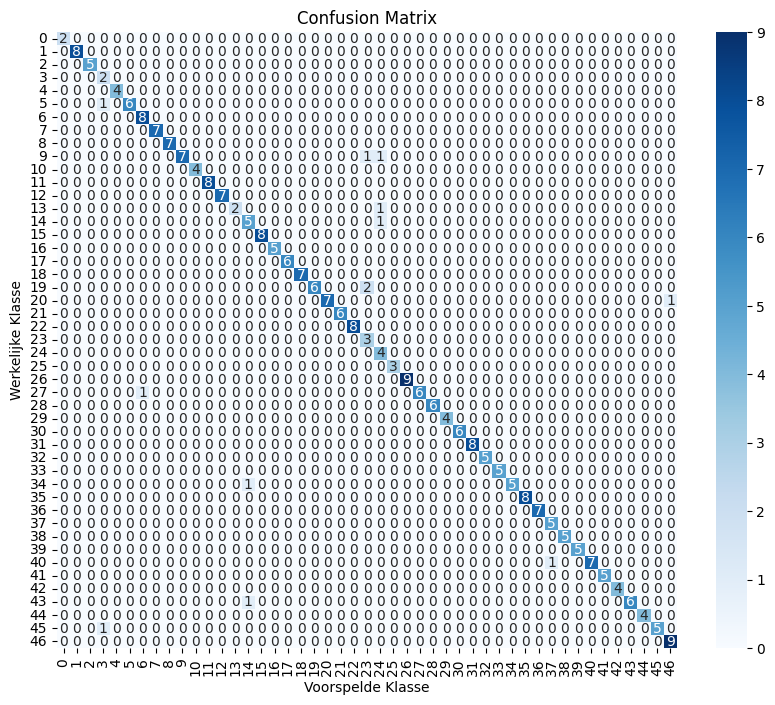

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Zorg ervoor dat je class_names hebt
class_names = [str(i) for i in range(num_classes)]  # Vervang dit met werkelijke horse_id's als nodig

# Voorspel de labels voor de testset
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Genereer de confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes)

# Plot de confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Voorspelde Klasse')
plt.ylabel('Werkelijke Klasse')
plt.title('Confusion Matrix')
plt.show()


Goal:

Create a model to recognize the horse (horse_id) based on an input picture or video:

1. Create stills from the videos.
2. Prepare data from the images folders under videos. ( training & validation data)
3. Create test data.
4. Create metada from training data and combinde it with the cropped one.
5. Create EDA on the resulted metadata. 
6. Train a classification model using these images.


----------------------


# 1. Create stills from videos

In [ ]:
import os
import cv2

# Create stills from videos
# Base path to the database
base_dir = '../data/THoDBRL2015'

# Function to extract frames from a video
def extract_frames(video_path, output_dir, frame_interval=30):

    # check if there is a output directory created, create it if not
    os.makedirs(output_dir, exist_ok=True)

    # cretae a video capture object to read the video 
    cap = cv2.VideoCapture(video_path)
    frame_count = 0
    saved_frame_count = 0

    # loop through the video frames
    while cap.isOpened():

        # read the frames 
        ret, frame = cap.read()

        # if no frames available, stop the loop
        if not ret:
            break

        # Save the frame if it matches the interval condition
        if frame_count % frame_interval == 0:

             # Create the output path for the frame (naming it with a zero-padded number)
            output_path = os.path.join(output_dir, f'frame_{saved_frame_count:04d}.jpg')

            # Save the frame as an image file
            cv2.imwrite(output_path, frame)
            saved_frame_count += 1

        frame_count += 1
    # Release the VideoCapture object to free resources
    cap.release()


# Process videos in each Part folder
for part in ['Part1', 'Part2', 'Part3', 'Part4', 'Part5']:


     # Path to the "videos" directory in the current "Part" folder
    videos_dir = os.path.join(base_dir, part, 'videos')


    # Loop through each subfolder in the "videos" directory (one for each horse ID)
    for horse_id_folder in os.listdir(videos_dir):
        horse_path = os.path.join(videos_dir, horse_id_folder)


        # Check if the current path is a directory (to avoid processing non-directory items)
        if os.path.isdir(horse_path):  # Ensure it's a directory


            # Loop through each video file in the horse's directory
            for video_file in os.listdir(horse_path):


                # Process only files with video extensions (e.g., .AVI, .mp4, .mov)
                if video_file.endswith(('.AVI', '.mp4', '.mov')): 
                    
                    # path to the video file
                    video_path = os.path.join(horse_path, video_file)

                    #Define the output directory to store the extracted stills
                    output_dir = os.path.join(horse_path, 'imagesStills')

                    # Extract frames from the video and save them to the output directory
                    extract_frames(video_path, output_dir, frame_interval=30)

</br>

# 2. Prepare data for model training:

In [ ]:
import shutil
import os

# 2. Prepare data for model training:
# Base path to the database
base_dir = '../data/THoDBRL2015'


# Consolidate images into a training directory
output_train_dir = os.path.join(base_dir, 'training_data')

os.makedirs(output_train_dir, exist_ok=True)

# Iterate through each Part folder
for part in ['Part1', 'Part2', 'Part3', 'Part4', 'Part5']:
    videos_dir = os.path.join(base_dir, part, 'videos')

    for horse_id_folder in os.listdir(videos_dir):
        horse_path = os.path.join(videos_dir, horse_id_folder)

        if os.path.isdir(horse_path):  # Ensure it's a directory
            # Find all stills folders (e.g., images, images1, images2, etc.)
            for stills_folder in os.listdir(horse_path):
                stills_path = os.path.join(horse_path, stills_folder)

                if os.path.isdir(stills_path) and stills_folder.startswith('images'):  # Check for folders named 'images*'
                    target_dir = os.path.join(output_train_dir, f'horse_{horse_id_folder}')

                    os.makedirs(target_dir, exist_ok=True)
                    
                    # Copy all image files from the stills folder to the target directory
                    for img_file in os.listdir(stills_path):
                        img_path = os.path.join(stills_path, img_file)

                        if img_file.endswith(('.jpg', '.jpeg', '.png')):  # Ensure it's an image file
                            shutil.copy(img_path, target_dir)

                    print(f"Copied images from {stills_path} to {target_dir}")


# for part in ['Part1', 'Part2', 'Part3', 'Part4', 'Part5']:
#     videos_dir = os.path.join(base_dir, part, 'videos')

#     for horse_id_folder in os.listdir(videos_dir):
#         horse_path = os.path.join(videos_dir, horse_id_folder)

#         if os.path.isdir(horse_path):  # Ensure it's a directory
#             images_dir = os.path.join(horse_path, 'images')

#             if os.path.exists(images_dir):
#                 target_dir = os.path.join(output_train_dir, f'horse_{horse_id_folder}')
#                 os.makedirs(target_dir, exist_ok=True)

#                 for img_file in os.listdir(images_dir):
#                     img_path = os.path.join(images_dir, img_file)
#                     shutil.copy(img_path, target_dir)
                    
print(target_dir)







Copied images from ../data/THoDBRL2015/Part1/videos/9/images1 to ../data/THoDBRL2015/training_data/horse_9
Copied images from ../data/THoDBRL2015/Part1/videos/9/images2 to ../data/THoDBRL2015/training_data/horse_9
Copied images from ../data/THoDBRL2015/Part1/videos/7/images1 to ../data/THoDBRL2015/training_data/horse_7
Copied images from ../data/THoDBRL2015/Part1/videos/7/images2 to ../data/THoDBRL2015/training_data/horse_7
Copied images from ../data/THoDBRL2015/Part1/videos/6/images1 to ../data/THoDBRL2015/training_data/horse_6
Copied images from ../data/THoDBRL2015/Part1/videos/6/images2 to ../data/THoDBRL2015/training_data/horse_6
Copied images from ../data/THoDBRL2015/Part1/videos/1/images to ../data/THoDBRL2015/training_data/horse_1
Copied images from ../data/THoDBRL2015/Part1/videos/10/images1 to ../data/THoDBRL2015/training_data/horse_10
Copied images from ../data/THoDBRL2015/Part1/videos/8/images1 to ../data/THoDBRL2015/training_data/horse_8
Copied images from ../data/THoDBRL20

</br>

## Check the number of resulted stills

In [ ]:
# Count all images added:
import os
# Path to the training_data directory
training_data_dir = os.path.join(base_dir, 'training_data')

# Initialize a counter
total_images = 0

# Iterate through each horse folder
for horse_folder in os.listdir(training_data_dir):
    horse_path = os.path.join(training_data_dir, horse_folder)
    if os.path.isdir(horse_path):  # Ensure it's a directory
        # Count images in the folder
        num_images = len([f for f in os.listdir(horse_path) if f.endswith(('.jpg', '.jpeg', '.png'))])
        total_images += num_images
        print(f"Horse {horse_folder} has {num_images} images.")

# Print the total count of images
print(f"Total images in training_data: {total_images}")

Horse horse_31 has 931 images.
Horse horse_36 has 957 images.
Horse horse_38 has 1785 images.
Horse horse_39 has 1356 images.
Horse horse_37 has 1351 images.
Horse horse_30 has 1276 images.
Horse horse_12 has 679 images.
Horse horse_15 has 1597 images.
Horse horse_23 has 1025 images.
Horse horse_24 has 1591 images.
Horse horse_41 has 1883 images.
Horse horse_5 has 349 images.
Horse horse_2 has 1029 images.
Horse horse_46 has 1592 images.
Horse horse_25 has 1136 images.
Horse horse_22 has 752 images.
Horse horse_14 has 2257 images.
Horse horse_13 has 1396 images.
Horse horse_47 has 913 images.
Horse horse_3 has 1282 images.
Horse horse_4 has 1173 images.
Horse horse_40 has 1591 images.
Horse horse_35 has 698 images.
Horse horse_32 has 670 images.
Horse horse_33 has 661 images.
Horse horse_34 has 1247 images.
Horse horse_8 has 1262 images.
Horse horse_1 has 1415 images.
Horse horse_45 has 1831 images.
Horse horse_42 has 2222 images.
Horse horse_6 has 562 images.
Horse horse_16 has 1292 i

</br>

# 3. Create test data

In [14]:
import os
import shutil

# Base directory
base_dir = '../data/THoDBRL2015'  # Adjust the path to your database
test_data_dir = os.path.join(base_dir, 'test_data')  # Output directory for test data
os.makedirs(test_data_dir, exist_ok=True)

# Iterate through each Part folder
for part in ['Part1', 'Part2', 'Part3', 'Part4', 'Part5']:
    cropped_images_dir = os.path.join(base_dir, part, 'Croped Images')
    for horse_id_folder in os.listdir(cropped_images_dir):
        horse_path = os.path.join(cropped_images_dir, horse_id_folder)
        if os.path.isdir(horse_path):  # Ensure it's a directory
            target_dir = os.path.join(test_data_dir, f'horse_{horse_id_folder}')
            os.makedirs(target_dir, exist_ok=True)
            
            # Copy all images from the cropped folder to the test data directory
            for img_file in os.listdir(horse_path):
                img_path = os.path.join(horse_path, img_file)
                if img_file.endswith(('.jpg', '.jpeg', '.png')):  # Ensure it's an image file
                    shutil.copy(img_path, target_dir)
            print(f"Copied images from {horse_path} to {target_dir}")

print("All test data has been consolidated into the 'test_data' directory.")



Copied images from ../data/THoDBRL2015/Part1/Croped Images/9 to ../data/THoDBRL2015/test_data/horse_9
Copied images from ../data/THoDBRL2015/Part1/Croped Images/7 to ../data/THoDBRL2015/test_data/horse_7
Copied images from ../data/THoDBRL2015/Part1/Croped Images/6 to ../data/THoDBRL2015/test_data/horse_6
Copied images from ../data/THoDBRL2015/Part1/Croped Images/1 to ../data/THoDBRL2015/test_data/horse_1
Copied images from ../data/THoDBRL2015/Part1/Croped Images/10 to ../data/THoDBRL2015/test_data/horse_10
Copied images from ../data/THoDBRL2015/Part1/Croped Images/8 to ../data/THoDBRL2015/test_data/horse_8
Copied images from ../data/THoDBRL2015/Part1/Croped Images/4 to ../data/THoDBRL2015/test_data/horse_4
Copied images from ../data/THoDBRL2015/Part1/Croped Images/3 to ../data/THoDBRL2015/test_data/horse_3
Copied images from ../data/THoDBRL2015/Part1/Croped Images/2 to ../data/THoDBRL2015/test_data/horse_2
Copied images from ../data/THoDBRL2015/Part1/Croped Images/5 to ../data/THoDBRL2

</br>

## Count all test data generated in previous step: 

In [ ]:
import os

# Path to the test_data directory
test_data_dir = os.path.join(base_dir, 'test_data')

# Initialize a counter
total_images = 0

# Iterate through each horse folder
for horse_folder in os.listdir(test_data_dir):
    horse_path = os.path.join(test_data_dir, horse_folder)
    if os.path.isdir(horse_path):  # Ensure it's a directory
        # Count images in the folder
        num_images = len([f for f in os.listdir(horse_path) if f.endswith(('.jpg', '.jpeg', '.png'))])
        total_images += num_images
        print(f"Horse {horse_folder} has {num_images} images.")

# Print the total count of images
print(f"Total images in test_data: {total_images}")


Horse horse_31 has 30 images.
Horse horse_36 has 30 images.
Horse horse_38 has 30 images.
Horse horse_39 has 30 images.
Horse horse_37 has 30 images.
Horse horse_30 has 30 images.
Horse horse_12 has 30 images.
Horse horse_15 has 30 images.
Horse horse_23 has 30 images.
Horse horse_24 has 30 images.
Horse horse_41 has 30 images.
Horse horse_5 has 30 images.
Horse horse_2 has 30 images.
Horse horse_46 has 30 images.
Horse horse_25 has 30 images.
Horse horse_22 has 30 images.
Horse horse_14 has 30 images.
Horse horse_13 has 30 images.
Horse horse_47 has 30 images.
Horse horse_3 has 30 images.
Horse horse_4 has 30 images.
Horse horse_40 has 30 images.
Horse horse_35 has 30 images.
Horse horse_32 has 30 images.
Horse horse_33 has 30 images.
Horse horse_34 has 30 images.
Horse horse_8 has 30 images.
Horse horse_1 has 30 images.
Horse horse_45 has 30 images.
Horse horse_42 has 30 images.
Horse horse_6 has 30 images.
Horse horse_16 has 30 images.
Horse horse_29 has 30 images.
Horse horse_11 ha

</br>

# 4. Create metadata from training data(stills) and combine it with the cropped images metadata 

In [ ]:
import os
import pandas as pd
import re
from PIL import Image

# Set the path to the training_data directory
training_data_dir = '../data/THoDBRL2015/training_data'

# Initialize a list to hold metadata for training data
training_metadata = []

# Walk through the training_data directory to collect metadata
for horse_folder in os.listdir(training_data_dir):
    horse_path = os.path.join(training_data_dir, horse_folder)
    if os.path.isdir(horse_path):  # Ensure it's a directory
        for filename in os.listdir(horse_path):
            if filename.endswith(('.png', '.jpg', '.jpeg')):  # Filter image files
                file_path = os.path.join(horse_path, filename)

                # Extract horse_id from the folder name
                match_horse_id = re.search(r'\d+$', horse_folder)
                horse_id = match_horse_id.group() if match_horse_id else None

                # Open the image to extract dimensions
                with Image.open(file_path) as img:
                    width, height = img.size  # .size returns (width, height)

                # Determine orientation
                if width > height:
                    orientation = 'Landscape'
                elif height > width:
                    orientation = 'Portrait'
                else:
                    orientation = 'Square'

                # Add metadata
                training_metadata.append({
                    'file_path': file_path,
                    'horse_id': horse_id,
                    'folder': horse_folder,  # Parent folder (horse ID folder)
                    'filename': filename,
                    'format': filename.split('.')[-1],
                    'file_size': os.path.getsize(file_path),
                    'width': width,
                    'height': height,
                    'aspect_ratio': width / height,
                    'orientation': orientation,
                })

# Convert the metadata list to a DataFrame
training_metadata_df = pd.DataFrame(training_metadata, dtype='object').astype({
    'file_path': 'string',
    'horse_id': 'int64',          # Assuming it's an integer
    'folder': 'string',
    'filename': 'string',
    'format': 'category',         # Categorical for file format
    'file_size': 'int64',         # Integer for file size in bytes
    'width': 'int64',             # Integer for width
    'height': 'int64',            # Integer for height
    'aspect_ratio': 'float',
    'orientation': 'category',
})

# Save the metadata to a CSV file
training_metadata_df.to_csv('metadata_training_data.csv', index=False)



# load the cropped images metadata
cropped_metadata_df = pd.read_csv('metada_THoDBRL2015')  

# Check for duplicates in cropped_metadata_df
cropped_duplicates = cropped_metadata_df['horse_id'].value_counts()
# Check for duplicates in training_metadata_df
training_duplicates = training_metadata_df['horse_id'].value_counts()

# print("Duplicates in cropped_metadata_df:")
# print(cropped_duplicates[cropped_duplicates > 1])
print()
print("Duplicates in training_metadata_df:")
print(training_duplicates[training_duplicates > 1])





# Combine Metadata Based on horse_id: Merge the two DataFrames using horse_id as the key:

combined_metadata_df = pd.merge(
    training_metadata_df,
    cropped_metadata_df,
    on='horse_id',
    suffixes=('_training', '_cropped')
)

# Save the combined metadata
combined_metadata_df.to_csv('combined_metadata.csv', index=False)


# preview the combined dataframe:
print()
print("Combined metadata of cropped images and stills from the videos: ")
combined_metadata_df





Duplicates in training_metadata_df:
horse_id
44    2705
14    2257
42    2222
41    1883
45    1831
38    1785
15    1597
46    1592
24    1591
40    1591
1     1415
13    1396
39    1356
37    1351
16    1292
3     1282
30    1276
8     1262
11    1248
34    1247
4     1173
21    1168
25    1136
10    1115
29    1073
2     1029
23    1025
43     991
36     957
31     931
47     913
28     872
26     825
20     808
17     753
22     752
35     698
12     679
32     670
33     661
7      632
18     598
27     566
6      562
9      512
19     394
5      349
Name: count, dtype: int64

Combined metadata of cropped images and stills from the videos: 


file_path_training  horse_id  \
0        ../data/THoDBRL2015/training_data/horse_31/img...        31   
1        ../data/THoDBRL2015/training_data/horse_31/img...        31   
2        ../data/THoDBRL2015/training_data/horse_31/img...        31   
3        ../data/THoDBRL2015/training_data/horse_31/img...        31   
4        ../data/THoDBRL2015/training_data/horse_31/img...        31   
...                                                    ...       ...   
1620625  ../data/THoDBRL2015/training_data/horse_28/img...        28   
1620626  ../data/THoDBRL2015/training_data/horse_28/img...        28   
1620627  ../data/THoDBRL2015/training_data/horse_28/img...        28   
1620628  ../data/THoDBRL2015/training_data/horse_28/img...        28   
1620629  ../data/THoDBRL2015/training_data/horse_28/img...        28   

        folder_training filename_training format_training  file_size_training  \
0              horse_31        img870.jpg             jpg               30663   
1              horse_31        img870.jpg             jpg               30663   
2              horse_31        img870.jpg             jpg               30663   
3              horse_31        img870.jpg             jpg               30663   
4              horse_31        img870.jpg             jpg               30663   
...                 ...               ...             ...                 ...   
1620625        horse_28        img869.jpg             jpg               32066   
1620626        horse_28        img869.jpg             jpg               32066   
1620627        horse_28        img869.jpg             jpg               32066   
1620628        horse_28        img869.jpg             jpg               32066   
1620629        horse_28        img869.jpg             jpg               32066   

         width_training  height_training  aspect_ratio_training  \
0                   640              480               1.333333   
1                   640              480               1.333333   
2                   640              480               1.333333   
3                   640              480               1.333333   
4                   640              480               1.333333   
...                 ...              ...                    ...   
1620625             640              480               1.333333   
1620626             640              480               1.333333   
1620627             640              480               1.333333   
1620628             640              480               1.333333   
1620629             640              480               1.333333   

        orientation_training  ... photo_id          folder_cropped  \
0                  Landscape  ...       10  Part4/Croped Images/31   
1                  Landscape  ...        9  Part4/Croped Images/31   
2                  Landscape  ...        8  Part4/Croped Images/31   
3                  Landscape  ...       10  Part4/Croped Images/31   
4                  Landscape  ...        4  Part4/Croped Images/31   
...                      ...  ...      ...                     ...   
1620625            Landscape  ...        5  Part3/Croped Images/28   
1620626            Landscape  ...        4  Part3/Croped Images/28   
1620627            Landscape  ...        1  Part3/Croped Images/28   
1620628            Landscape  ...        3  Part3/Croped Images/28   
1620629            Landscape  ...        2  Part3/Croped Images/28   

        filename_cropped format_cropped camera_position file_size_cropped  \
0              Dhr10.jpg            jpg           Right              6292   
1               Ghr9.jpg            jpg            Left              6408   
2               Ghr8.jpg            jpg            Left              6316   
3              fhr10.jpg            jpg           Front              7148   
4               fhr4.jpg            jpg           Front              8137   
...                  ...            ...             ...               ...   
1620625         G

the resulted metadata is larger than expected...something went wrong...i think the way i combined the files based on horse_id is the problem

In [ ]:
# Displaying a preview of the training metadata DataFrame
print("Training images metadata: ")
training_metadata_df.head()

Training images metadata: 


file_path  horse_id    folder  \
0  ../data/THoDBRL2015/training_data/horse_31/img...        31  horse_31   
1  ../data/THoDBRL2015/training_data/horse_31/img...        31  horse_31   
2  ../data/THoDBRL2015/training_data/horse_31/img...        31  horse_31   
3  ../data/THoDBRL2015/training_data/horse_31/img...        31  horse_31   
4  ../data/THoDBRL2015/training_data/horse_31/img...        31  horse_31   

     filename format  file_size  width  height  aspect_ratio orientation  
0  img870.jpg    jpg      30663    640     480      1.333333   Landscape  
1  img864.jpg    jpg      30517    640     480      1.333333   Landscape  
2  img694.jpg    jpg      37611    640     480      1.333333   Landscape  
3  img680.jpg    jpg      37003    640     480      1.333333   Landscape  
4  img858.jpg    jpg      30856    640     480      1.333333   Landscape

Fix the metadada by aggregate data before merge:

In [2]:
import os
import pandas as pd
import re
from PIL import Image

# Set the path to the training_data directory
training_data_dir = '../data/THoDBRL2015/training_data'

# Initialize a list to hold metadata for training data
training_metadata = []

# Walk through the training_data directory to collect metadata
for horse_folder in os.listdir(training_data_dir):
    horse_path = os.path.join(training_data_dir, horse_folder)
    if os.path.isdir(horse_path):  # Ensure it's a directory
        for filename in os.listdir(horse_path):
            if filename.endswith(('.png', '.jpg', '.jpeg')):  # Filter image files
                file_path = os.path.join(horse_path, filename)

                # Extract horse_id from the folder name
                match_horse_id = re.search(r'\d+$', horse_folder)
                horse_id = match_horse_id.group() if match_horse_id else None

                # Open the image to extract dimensions
                with Image.open(file_path) as img:
                    width, height = img.size  # .size returns (width, height)

                # Determine orientation
                if width > height:
                    orientation = 'Landscape'
                elif height > width:
                    orientation = 'Portrait'
                else:
                    orientation = 'Square'

                # Add metadata
                training_metadata.append({
                    'file_path': file_path,
                    'horse_id': horse_id,
                    'folder': horse_folder,  # Parent folder (horse ID folder)
                    'filename': filename,
                    'format': filename.split('.')[-1],
                    'file_size': os.path.getsize(file_path),
                    'width': width,
                    'height': height,
                    'aspect_ratio': width / height,
                    'orientation': orientation,
                })

# Convert the metadata list to a DataFrame
training_metadata_df = pd.DataFrame(training_metadata, dtype='object').astype({
    'file_path': 'string',
    'horse_id': 'int64',          # Assuming it's an integer
    'folder': 'string',
    'filename': 'string',
    'format': 'category',         # Categorical for file format
    'file_size': 'int64',         # Integer for file size in bytes
    'width': 'int64',             # Integer for width
    'height': 'int64',            # Integer for height
    'aspect_ratio': 'float',
    'orientation': 'category',
})

# Save the metadata to a CSV file
training_metadata_df.to_csv('metadata_training_data.csv', index=False)



# load the cropped images metadata
cropped_metadata_df = pd.read_csv('metada_THoDBRL2015')  

# Check for duplicates in cropped_metadata_df
cropped_duplicates = cropped_metadata_df['horse_id'].value_counts()
# Check for duplicates in training_metadata_df
training_duplicates = training_metadata_df['horse_id'].value_counts()

# print("Duplicates in cropped_metadata_df:")
# print(cropped_duplicates[cropped_duplicates > 1])
print()
print("Duplicates in training_metadata_df:")
print(training_duplicates[training_duplicates > 1])

# Aggregate training metadata by horse_id
training_agg_df = training_metadata_df.groupby('horse_id', as_index=False).agg({
    'file_path': lambda x: list(x),  # Collect file paths as a list
    'folder': 'first',              # Keep the first folder name
    'filename': lambda x: list(x),  # Collect filenames as a list
    'format': lambda x: list(x),    # Collect formats as a list
    'file_size': 'sum',             # Sum file sizes
    'width': 'mean',                # Calculate mean width
    'height': 'mean',               # Calculate mean height
    'aspect_ratio': 'mean',         # Calculate mean aspect ratio
    'orientation': lambda x: list(x)  # Collect orientations as a list
})

# Aggregate cropped metadata by horse_id
cropped_agg_df = cropped_metadata_df.groupby('horse_id', as_index=False).agg({
    'file_path': lambda x: list(x),  # Collect file paths as a list
    'filename': lambda x: list(x),  # Collect filenames as a list
    # Add any other necessary aggregations for the cropped_metadata_df columns
})

# Merge aggregated dataframes
combined_metadata_df = pd.merge(
    training_agg_df,
    cropped_agg_df,
    on='horse_id',
    suffixes=('_training', '_cropped')
)

# Save the combined metadata
combined_metadata_df.to_csv('combined_metadata.csv', index=False)

# Preview the combined dataframe
print("Combined metadata of cropped images and stills from the videos: ")
combined_metadata_df



Duplicates in training_metadata_df:
horse_id
44    2705
14    2257
42    2222
41    1883
45    1831
38    1785
15    1597
46    1592
24    1591
40    1591
1     1415
13    1396
39    1356
37    1351
16    1292
3     1282
30    1276
8     1262
11    1248
34    1247
4     1173
21    1168
25    1136
10    1115
29    1073
2     1029
23    1025
43     991
36     957
31     931
47     913
28     872
26     825
20     808
17     753
22     752
35     698
12     679
32     670
33     661
7      632
18     598
27     566
6      562
9      512
19     394
5      349
Name: count, dtype: int64
Combined metadata of cropped images and stills from the videos: 


horse_id                                 file_path_training    folder  \
0          1  [../data/THoDBRL2015/training_data/horse_1/img...   horse_1   
1          2  [../data/THoDBRL2015/training_data/horse_2/img...   horse_2   
2          3  [../data/THoDBRL2015/training_data/horse_3/img...   horse_3   
3          4  [../data/THoDBRL2015/training_data/horse_4/img...   horse_4   
4          5  [../data/THoDBRL2015/training_data/horse_5/img...   horse_5   
5          6  [../data/THoDBRL2015/training_data/horse_6/img...   horse_6   
6          7  [../data/THoDBRL2015/training_data/horse_7/img...   horse_7   
7          8  [../data/THoDBRL2015/training_data/horse_8/img...   horse_8   
8          9  [../data/THoDBRL2015/training_data/horse_9/img...   horse_9   
9         10  [../data/THoDBRL2015/training_data/horse_10/im...  horse_10   
10        11  [../data/THoDBRL2015/training_data/horse_11/im...  horse_11   
11        12  [../data/THoDBRL2015/training_data/horse_12/im...  horse_12   
12        13  [../data/THoDBRL2015/training_data/horse_13/im...  horse_13   
13        14  [../data/THoDBRL2015/training_data/horse_14/im...  horse_14   
14        15  [../data/THoDBRL2015/training_data/horse_15/im...  horse_15   
15        16  [../data/THoDBRL2015/training_data/horse_16/im...  horse_16   
16        17  [../data/THoDBRL2015/training_data/horse_17/im...  horse_17   
17        18  [../data/THoDBRL2015/training_data/horse_18/im...  horse_18   
18        19  [../data/THoDBRL2015/training_data/horse_19/im...  horse_19   
19        20  [../data/THoDBRL2015/training_data/horse_20/im...  horse_20   
20        21  [../data/THoDBRL2015/training_data/horse_21/im...  horse_21   
21        22  [../data/THoDBRL2015/training_data/horse_22/im...  horse_22   
22        23  [../data/THoDBRL2015/training_data/horse_23/im...  horse_23   
23        24  [../data/THoDBRL2015/training_data/horse_24/im...  horse_24   
24        25  [../data/THoDBRL2015/training_data/horse_25/im...  horse_25   
25        26  [../data/THoDBRL2015/training_data/horse_26/im...  horse_26   
26        27  [../data/THoDBRL2015/training_data/horse_27/im...  horse_27   
27        28  [../data/THoDBRL2015/training_data/horse_28/im...  horse_28   
28        29  [../data/THoDBRL2015/training_data/horse_29/im...  horse_29   
29        30  [../data/THoDBRL2015/training_data/horse_30/im...  horse_30   
30        31  [../data/THoDBRL2015/training_data/horse_31/im...  horse_31   
31        32  [../data/THoDBRL2015/training_data/horse_32/im...  horse_32   
32        33  [../data/THoDBRL2015/training_data/horse_33/im...  horse_33   
33        34  [../data/THoDBRL2015/training_data/horse_34/im...  horse_34   
34        35  [../data/THoDBRL2015/training_data/horse_35/im...  horse_35   
35        36  [../data/THoDBRL2015/training_data/horse_36/im...  horse_36   
36        37  [../data/THoDBRL2015/training_data/horse_37/im...  horse_37   
37        38  [../data/THoDBRL2015/training_data/horse_38/im...  horse_38   
38        39  [../data/THoDBRL2015/training_data/horse_39/im...  horse_39   
39        40  [../data/THoDBRL2015/training_data/horse_40/im...  horse_40   
40        41  [../data/THoDBRL2015/training_data/horse_41/im...  horse_41   
41        42  [../data/THoDBRL2015/training_data/horse_42/im...  horse_42   
42        43  [../data/THoDBRL2015/training_data/horse_43/im...  horse_43   
43        44  [../data/THoDBRL2015/training_data/horse_44/im...  horse_44   
44        45  [../data/THoDBRL2015/training_data/horse_45/im...  horse_45   
45        46  [../data/THoDBRL2015/training_data/horse_46/im...  horse_46   
46        47  [../data/THoDBRL2015/training_data/horse_47/im...  horse_47   

                                    filename_training  \
0   [img870.jpg, img864.jpg, img1249.jpg, img1261....   
1   [img870.jpg, img864.jpg, img694.jpg, img680.jp...   
2   [img870.jpg, img864.jpg, img1249.jpg, img1261....   
3   [img870.jpg, img864.jpg, img694.jpg, img680.jp...   
4   [img119.jpg, img13

</br>

# 5. Create EDA on resulted metadata

In [6]:
import pandas as pd

# Load the dataset to inspect its structure
file_path = '../scripts/combined_metadata.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   horse_id            47 non-null     int64  
 1   file_path_training  47 non-null     object 
 2   folder              47 non-null     object 
 3   filename_training   47 non-null     object 
 4   format              47 non-null     object 
 5   file_size           47 non-null     int64  
 6   width               47 non-null     float64
 7   height              47 non-null     float64
 8   aspect_ratio        47 non-null     float64
 9   orientation         47 non-null     object 
 10  file_path_cropped   47 non-null     object 
 11  filename_cropped    47 non-null     object 
dtypes: float64(3), int64(2), object(7)
memory usage: 4.5+ KB


(   horse_id                                 file_path_training   folder  \
 0         1  ['../data/THoDBRL2015/training_data/horse_1/im...  horse_1   
 1         2  ['../data/THoDBRL2015/training_data/horse_2/im...  horse_2   
 2         3  ['../data/THoDBRL2015/training_data/horse_3/im...  horse_3   
 3         4  ['../data/THoDBRL2015/training_data/horse_4/im...  horse_4   
 4         5  ['../data/THoDBRL2015/training_data/horse_5/im...  horse_5   
 
                                    filename_training  \
 0  ['img870.jpg', 'img864.jpg', 'img1249.jpg', 'i...   
 1  ['img870.jpg', 'img864.jpg', 'img694.jpg', 'im...   
 2  ['img870.jpg', 'img864.jpg', 'img1249.jpg', 'i...   
 3  ['img870.jpg', 'img864.jpg', 'img694.jpg', 'im...   
 4  ['img119.jpg', 'img131.jpg', 'img125.jpg', 'im...   
 
                                               format  file_size  width  \
 0  ['jpg', 'jpg', 'jpg', 'jpg', 'jpg', 'jpg', 'jp...   49639781  640.0   
 1  ['jpg', 'jpg', 'jpg', 'jpg', 'jpg', 'jpg', '

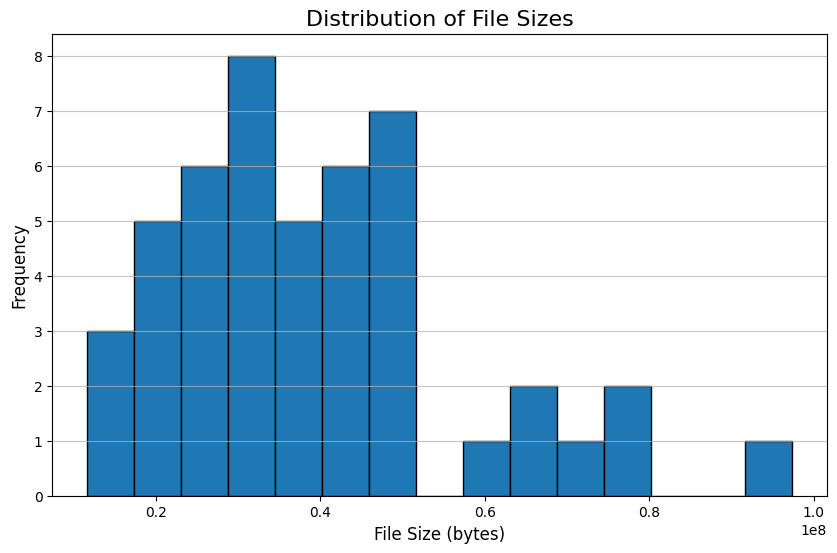

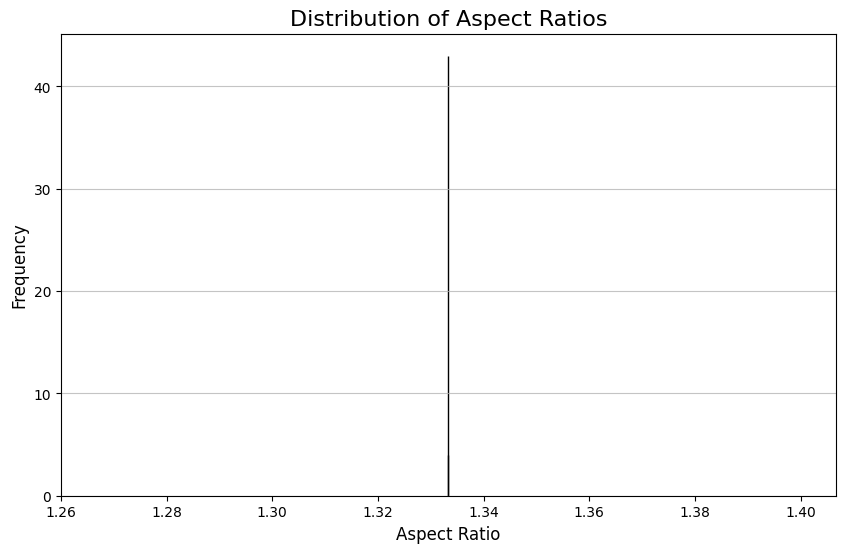

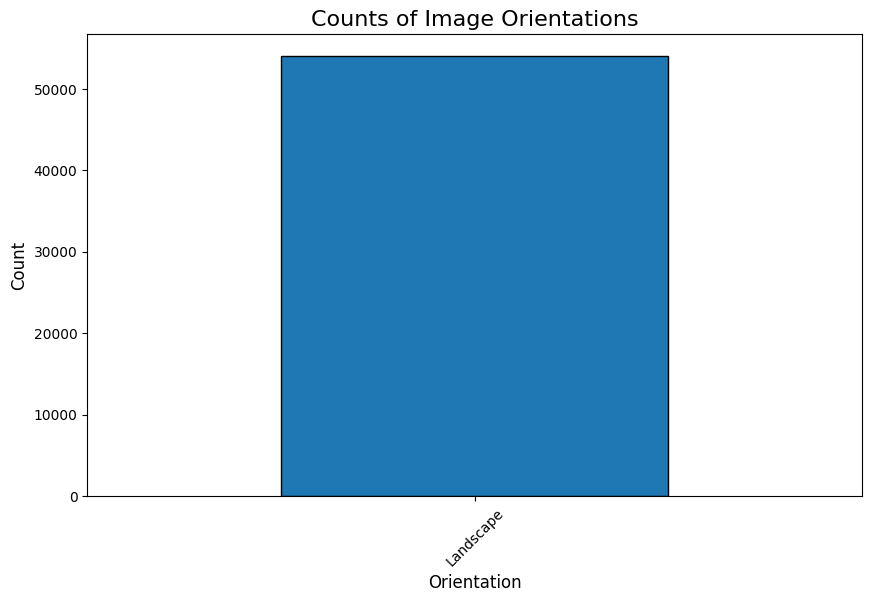

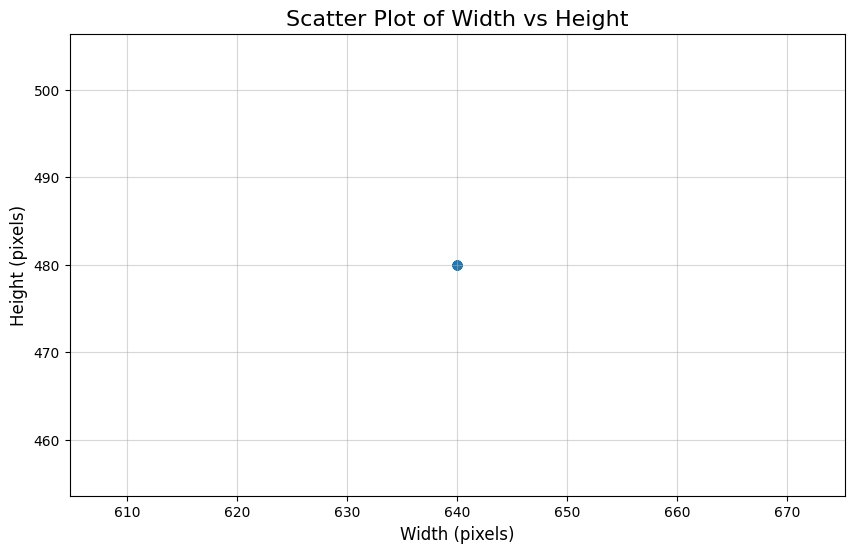

In [7]:
import matplotlib.pyplot as plt

# Distribution of file sizes
plt.figure(figsize=(10, 6))
plt.hist(data['file_size'], bins=15, edgecolor='black')
plt.title('Distribution of File Sizes', fontsize=16)
plt.xlabel('File Size (bytes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.show()

# Distribution of aspect ratios
plt.figure(figsize=(10, 6))
plt.hist(data['aspect_ratio'], bins=15, edgecolor='black', color='orange')
plt.title('Distribution of Aspect Ratios', fontsize=16)
plt.xlabel('Aspect Ratio', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.show()

# Orientation counts
orientation_counts = data['orientation'].apply(eval).explode().value_counts()
plt.figure(figsize=(10, 6))
orientation_counts.plot(kind='bar', edgecolor='black')
plt.title('Counts of Image Orientations', fontsize=16)
plt.xlabel('Orientation', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Scatter plot of width vs height
plt.figure(figsize=(10, 6))
plt.scatter(data['width'], data['height'], alpha=0.7)
plt.title('Scatter Plot of Width vs Height', fontsize=16)
plt.xlabel('Width (pixels)', fontsize=12)
plt.ylabel('Height (pixels)', fontsize=12)
plt.grid(alpha=0.5)
plt.show()


1. Distribution of File Sizes

- Visualization: Histogram showing the spread of file sizes.

- Insight: File sizes are unevenly distributed, with certain ranges being more frequent, indicating potential differences in file resolution or compression methods.

2. Distribution of Aspect Ratios

- Visualization: Histogram showing the distribution of aspect ratios.

- Insight: Most images have a consistent aspect ratio, potentially indicating standardized image dimensions.

3. Counts of Image Orientations

- Visualization: Bar chart displaying the frequency of orientations (e.g., Landscape, Portrait).

- Insight: Landscape orientation dominates the dataset, which might be expected based on the dataset's context.

4. Scatter Plot of Width vs. Height

- Visualization: Scatter plot mapping image width against height.

- Insight: Strong linear relationship between width and height suggests standardized image dimensions.

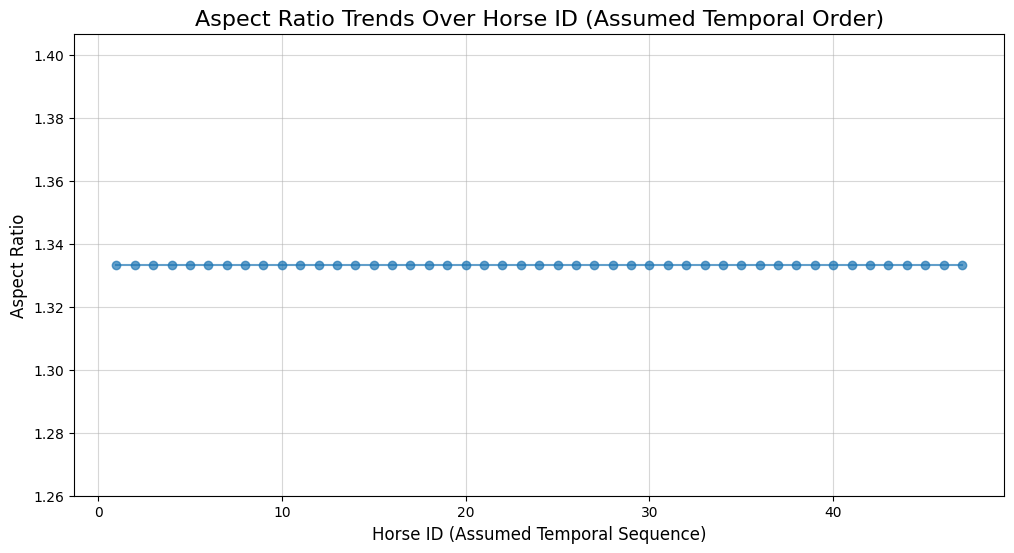

In [8]:
# Plot aspect ratio trends over the assumed time sequence (horse_id)
plt.figure(figsize=(12, 6))
plt.plot(data['horse_id'], data['aspect_ratio'], marker='o', linestyle='-', alpha=0.7)
plt.title('Aspect Ratio Trends Over Horse ID (Assumed Temporal Order)', fontsize=16)
plt.xlabel('Horse ID (Assumed Temporal Sequence)', fontsize=12)
plt.ylabel('Aspect Ratio', fontsize=12)
plt.grid(alpha=0.5)
plt.show()


5. Aspect Ratio Trends Over Time (Using Horse ID as a Proxy for Time)

- Visualization: Line plot of aspect ratios against horse IDs.

- Insight: Aspect ratios remain mostly consistent over time, with slight variations, indicating a standardized image format throughout the dataset.

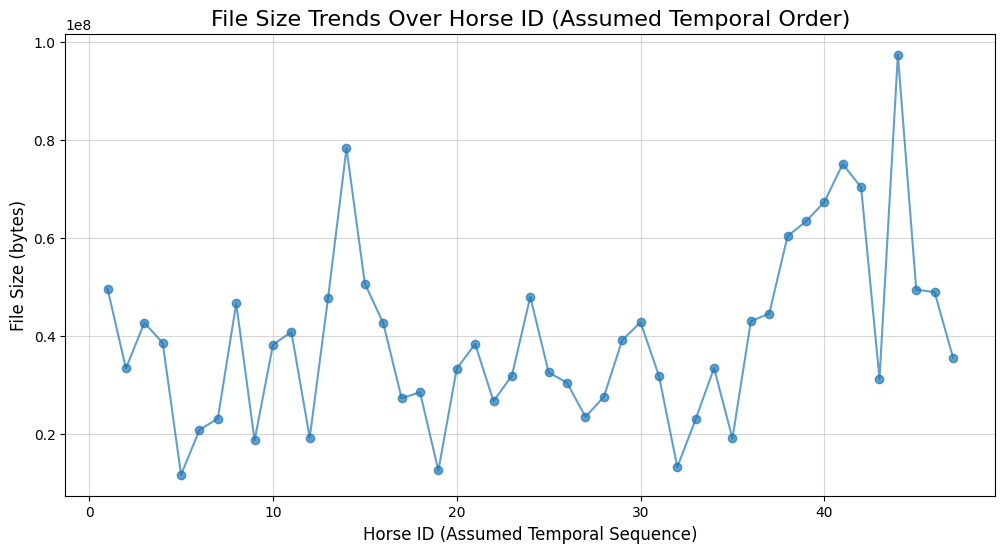

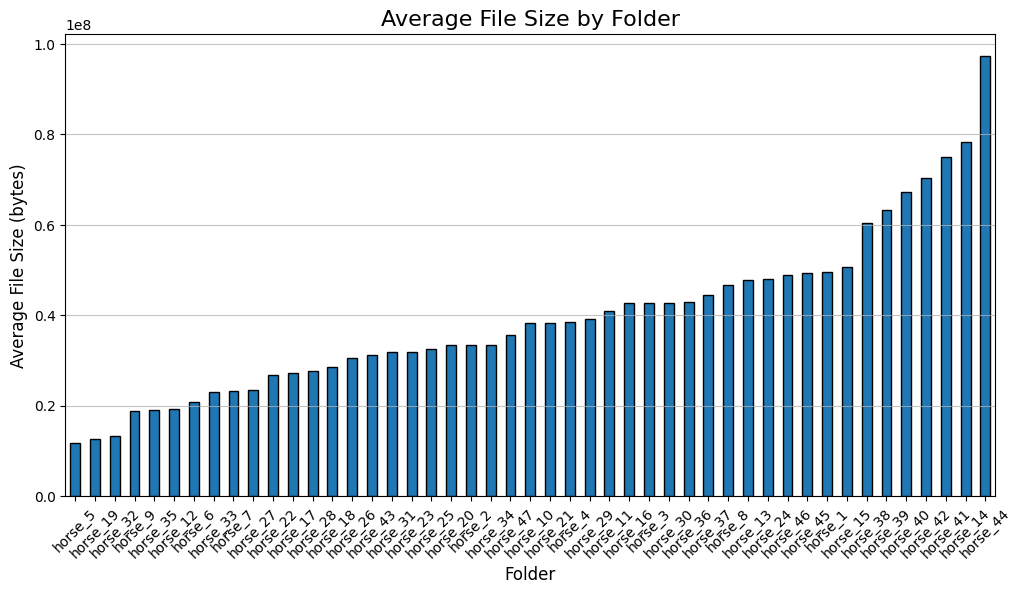

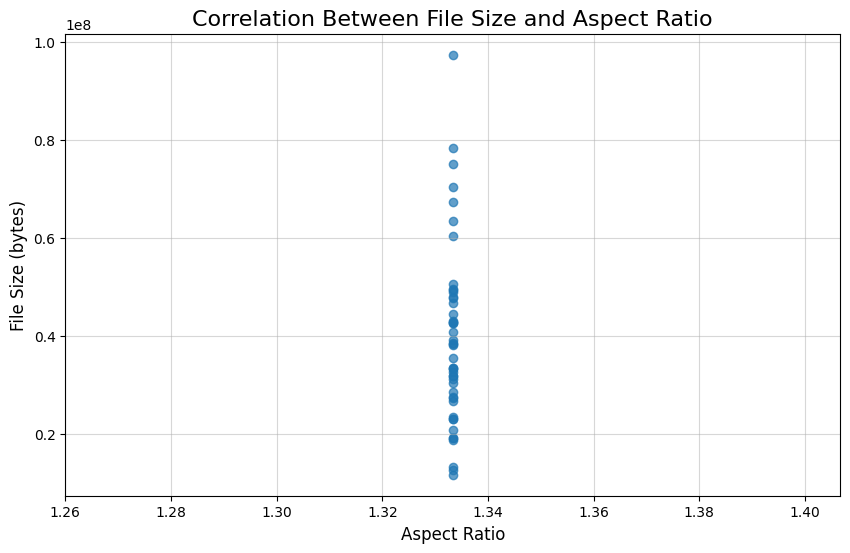

In [9]:
# File size trends over horse_id (assumed temporal order)
plt.figure(figsize=(12, 6))
plt.plot(data['horse_id'], data['file_size'], marker='o', linestyle='-', alpha=0.7)
plt.title('File Size Trends Over Horse ID (Assumed Temporal Order)', fontsize=16)
plt.xlabel('Horse ID (Assumed Temporal Sequence)', fontsize=12)
plt.ylabel('File Size (bytes)', fontsize=12)
plt.grid(alpha=0.5)
plt.show()

# File size distributions across folders
plt.figure(figsize=(12, 6))
data.groupby('folder')['file_size'].mean().sort_values().plot(kind='bar', edgecolor='black')
plt.title('Average File Size by Folder', fontsize=16)
plt.xlabel('Folder', fontsize=12)
plt.ylabel('Average File Size (bytes)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()

# Correlation between file size and aspect ratio
plt.figure(figsize=(10, 6))
plt.scatter(data['aspect_ratio'], data['file_size'], alpha=0.7)
plt.title('Correlation Between File Size and Aspect Ratio', fontsize=16)
plt.xlabel('Aspect Ratio', fontsize=12)
plt.ylabel('File Size (bytes)', fontsize=12)
plt.grid(alpha=0.5)
plt.show()


6. File Size Trends Over Time (Using Horse ID as a Proxy for Time)

- Visualization: Line plot of file sizes against horse IDs.

- Insight: File sizes fluctuate over time, indicating variations in image content, quality, or compression.

7. Average File Size by Folder

- Visualization: Bar chart of average file sizes across folders.

- Insight: Some folders have significantly larger or smaller file sizes, suggesting variations in the 
number or quality of images per folder.

8. Correlation Between File Size and Aspect Ratio

- Visualization: Scatter plot of file size against aspect ratio.

- Insight: No strong relationship between file size and aspect ratio, indicating file size is more influenced by resolution or compression than dimensions.

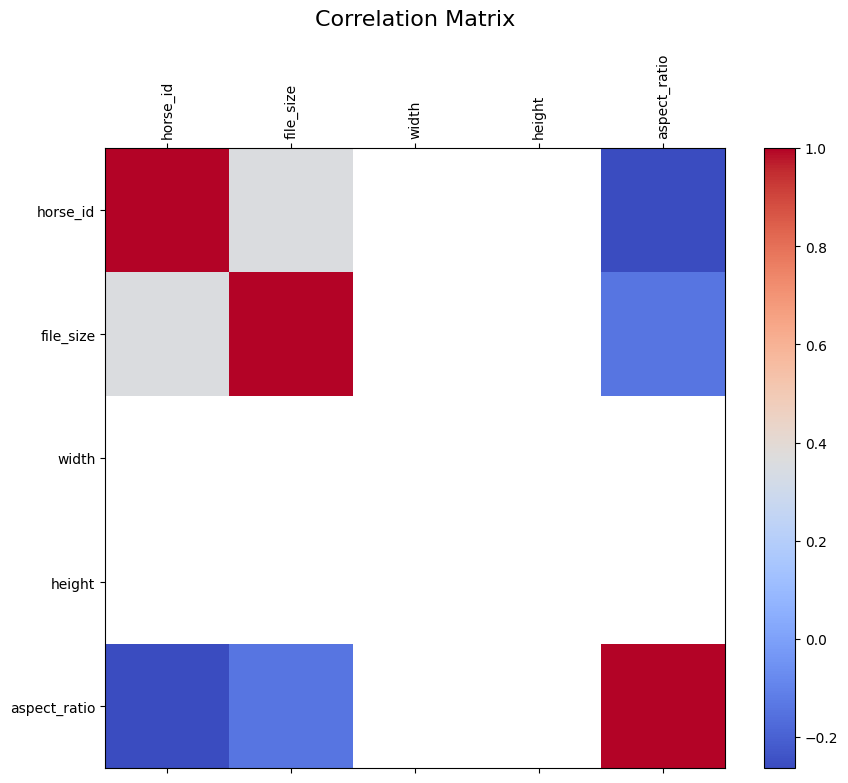

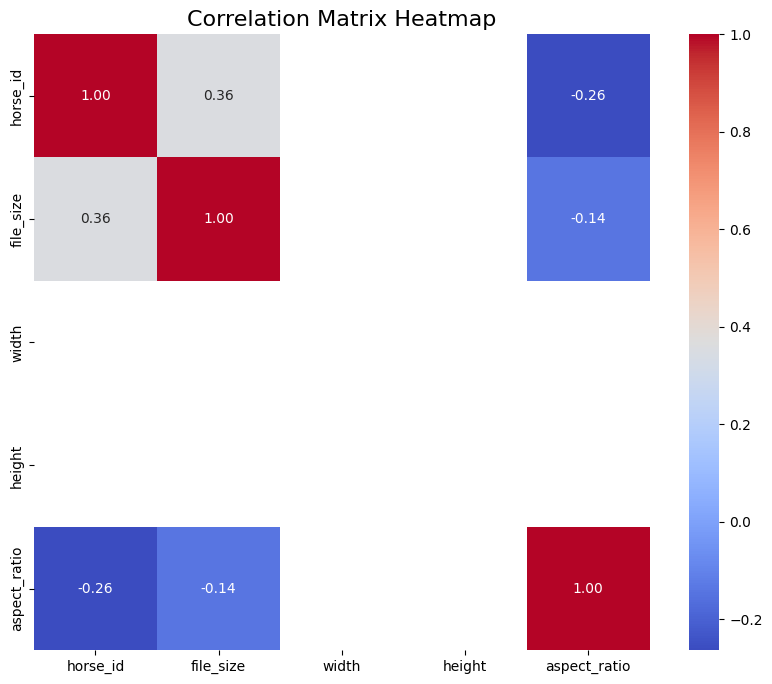

In [11]:
# Compute correlation matrix for numerical columns
correlation_matrix = data.select_dtypes(include=['float64', 'int64']).corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
plt.matshow(correlation_matrix, fignum=1, cmap='coolwarm')
plt.colorbar()
plt.title('Correlation Matrix', fontsize=16, pad=20)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()

# Display the correlation matrix as a heatmap for better clarity
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()


12. Correlation Matrix

- Visualization: Heatmap and matrix plot of correlations among numerical variables.

- Insight:

Strong positive correlation between width and height, indicating standardized proportions.

File size correlates moderately with width and height, as expected due to resolution effects.

Weak or no correlation between aspect ratio and other variables, suggesting aspect ratio is not a significant factor in file size or resolution.

</br>

# 6. Train a Classification Model

In [16]:
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


# Load the dataset
dataset_path = os.path.join(base_dir, 'training_data')
dataset = image_dataset_from_directory(
    dataset_path,
    labels='inferred',
    label_mode='int',  # Integer labels
    image_size=(128, 128),  # Resize all images
    batch_size=32  # Adjust batch size as needed
)

# Split into training and validation sets
train_dataset = dataset.take(80)  # 80% for training
val_dataset = dataset.skip(80)    # 20% for validation


# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Regularization
    Dense(len(dataset.class_names), activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_dataset, validation_data=val_dataset, epochs=10)




Found 54021 files belonging to 47 classes.
Epoch 1/10


/Users/alex/Desktop/GitHub/HorseFace/venv_horseface/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


80/80 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - accuracy: 0.0337 - loss: 28.6812 - val_accuracy: 0.0412 - val_loss: 3.8413
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 90s 1s/step - accuracy: 0.0373 - loss: 3.8379 - val_accuracy: 0.0503 - val_loss: 3.8325
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 92s 1s/step - accuracy: 0.0507 - loss: 3.8287 - val_accuracy: 0.0502 - val_loss: 3.8247
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 92s 1s/step - accuracy: 0.0489 - loss: 3.8203 - val_accuracy: 0.0503 - val_loss: 3.8175
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 95s 1s/step - accuracy: 0.0525 - loss: 3.8129 - val_accuracy: 0.0503 - val_loss: 3.8112
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 90s 1s/step - accuracy: 0.0461 - loss: 3.8070 - val_accuracy: 0.0502 - val_loss: 3.8058
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.0472 - loss: 3.8014 - val_accuracy: 0.0503 - val_loss: 3.8008
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.0506 - loss: 3.7945 - val_accuracy: 0.0503 - val_loss: 3.7963
Ep

# Evaluate Unseen Test Data

In [17]:
test_dataset_path = os.path.join(base_dir, 'test_data')

test_dataset = image_dataset_from_directory(
    test_dataset_path,
    labels='inferred',  # Automatically infer labels from subfolder names
    label_mode='int',   # Integer labels
    image_size=(128, 128),  # Resize all images to match the model's input size
    batch_size=32        # Adjust batch size as needed
)

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_dataset)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Found 1410 files belonging to 47 classes.
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.0170 - loss: 3.8695
Test Loss: 3.8701
Test Accuracy: 0.0213


## Predict Labels for Test Images

In [25]:
import numpy as np

# Get true labels and predictions
true_labels = []
predicted_labels = []

for images, labels in test_dataset:
    preds = model.predict(images)
    true_labels.extend(labels.numpy())  # Convert TensorFlow tensors to NumPy
    predicted_labels.extend(np.argmax(preds, axis=1))  # Get predicted class indices


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━

### Visualize Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


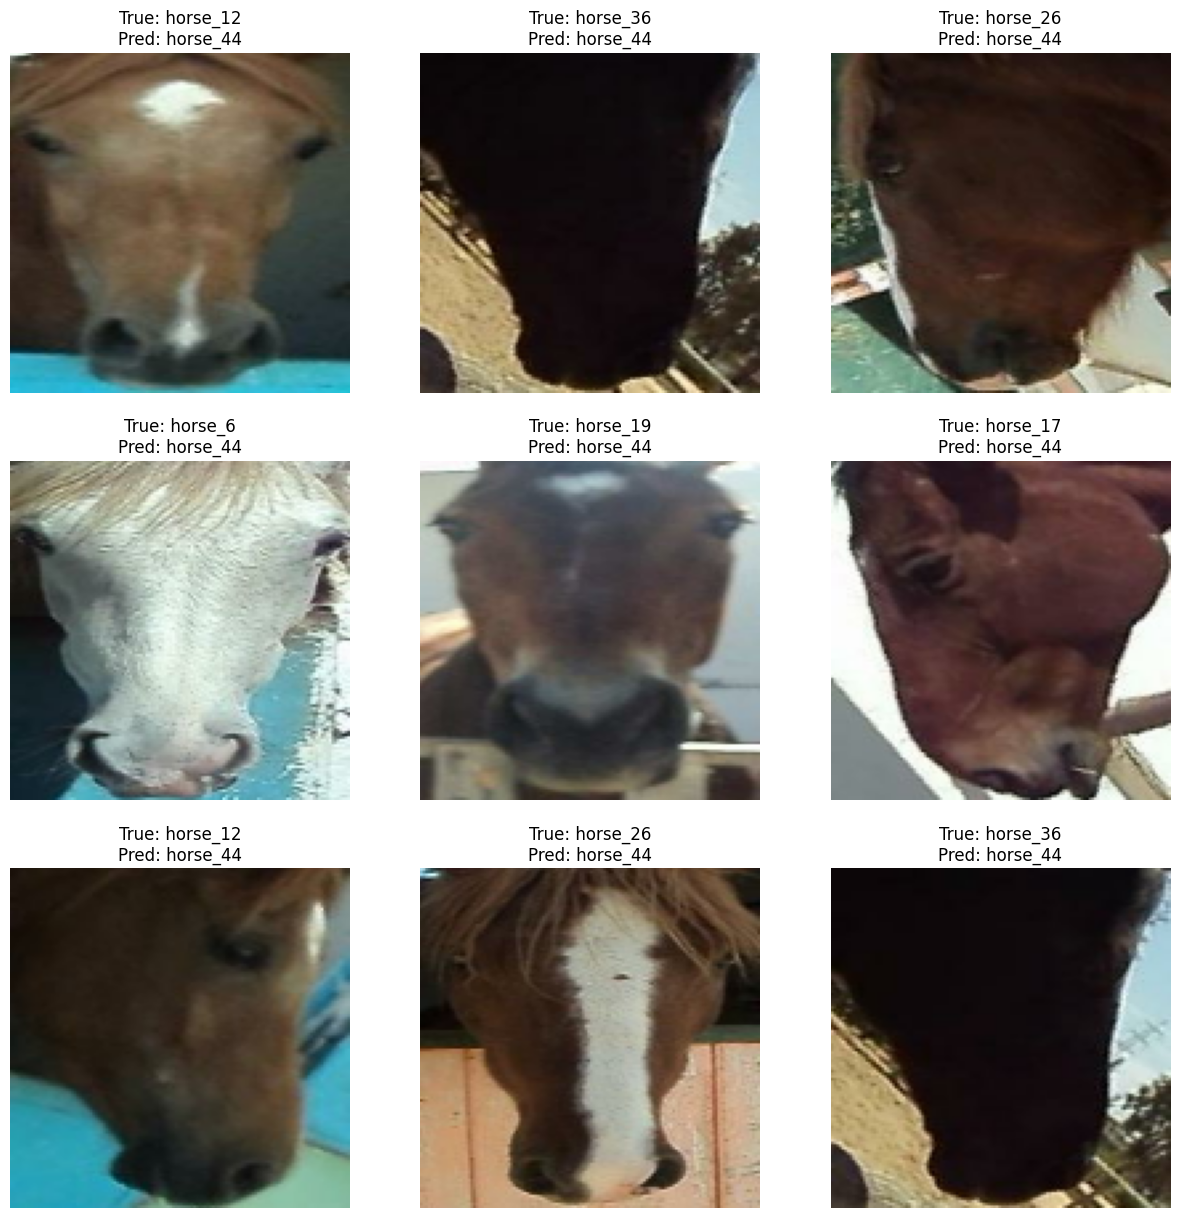

2024-12-03 11:43:15.529484: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [19]:
import matplotlib.pyplot as plt

# Display a few test images with predictions
for images, labels in test_dataset.take(1):  # Take one batch from the test dataset
    preds = model.predict(images)
    predicted_classes = np.argmax(preds, axis=1)

    plt.figure(figsize=(15, 15))
    for i in range(9):  # Display the first 9 images
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"True: {test_dataset.class_names[labels[i]]}\nPred: {test_dataset.class_names[predicted_classes[i]]}")
        plt.axis('off')
    plt.show()


### Generate clasification Report

In [20]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(true_labels, predicted_labels, target_names=test_dataset.class_names)
print("Classification Report:\n")
print(report)


Classification Report:

              precision    recall  f1-score   support

     horse_1       0.00      0.00      0.00        30
    horse_10       0.00      0.00      0.00        30
    horse_11       0.00      0.00      0.00        30
    horse_12       0.00      0.00      0.00        30
    horse_13       0.00      0.00      0.00        30
    horse_14       0.00      0.00      0.00        30
    horse_15       0.00      0.00      0.00        30
    horse_16       0.00      0.00      0.00        30
    horse_17       0.00      0.00      0.00        30
    horse_18       0.00      0.00      0.00        30
    horse_19       0.00      0.00      0.00        30
     horse_2       0.00      0.00      0.00        30
    horse_20       0.00      0.00      0.00        30
    horse_21       0.00      0.00      0.00        30
    horse_22       0.00      0.00      0.00        30
    horse_23       0.00      0.00      0.00        30
    horse_24       0.00      0.00      0.00        30
   

/Users/alex/Desktop/GitHub/HorseFace/venv_horseface/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/alex/Desktop/GitHub/HorseFace/venv_horseface/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/alex/Desktop/GitHub/HorseFace/venv_horseface/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

### Plot confusion Matrix

<Figure size 5000x4500 with 0 Axes>

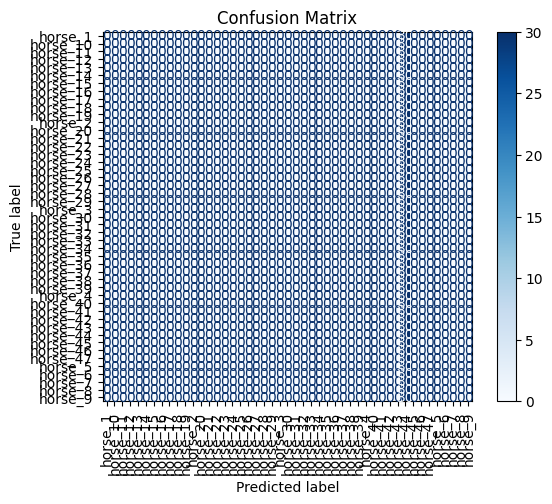

In [24]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_dataset.class_names)

# Plot confusion matrix
plt.figure(figsize=(50, 45))
cm_display.plot(cmap='Blues', xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()


# Let s redo the training of the cnn, combining the cropped images too!

In [27]:
import os
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import image_dataset_from_directory
from sklearn.model_selection import train_test_split
import numpy as np

# Base directory paths
training_data_path = '../data/THoDBRL2015/training_data'
test_data_path = '../data/THoDBRL2015/test_data'

# Load training_data and test_data separately
training_dataset = image_dataset_from_directory(
    training_data_path,
    labels='inferred',
    label_mode='int',
    image_size=(128, 128),
    batch_size=32
)

test_dataset_raw = image_dataset_from_directory(
    test_data_path,
    labels='inferred',
    label_mode='int',
    image_size=(128, 128),
    batch_size=32
)

# Combine datasets into one NumPy array
images = []
labels = []

for img_batch, label_batch in training_dataset:
    images.extend(img_batch.numpy())
    labels.extend(label_batch.numpy())

for img_batch, label_batch in test_dataset_raw:
    images.extend(img_batch.numpy())
    labels.extend(label_batch.numpy())

images = np.array(images)
labels = np.array(labels)

# Split the combined data into training, validation, and test datasets
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.3, random_state=42, stratify=labels)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Convert the splits into TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(32).shuffle(len(X_train))
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(32)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32)

# Extract class names from the training dataset
class_names = training_dataset.class_names
num_classes = len(class_names)

# Define the CNN model
model = Sequential([
    # Extract spatial features (edges, textures, patterns).
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    # Reduces the spatial dimensions and computation, retaining essential features.
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
     # Converts the 2D feature maps into a 1D vector.
    Flatten(),
    # Fully connected layers to learn complex patterns.
    Dense(128, activation='relu'),
    
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_dataset, validation_data=val_dataset, epochs=10)

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Found 54021 files belonging to 47 classes.
Found 1410 files belonging to 47 classes.


2024-12-03 12:04:54.293025: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
/Users/alex/Desktop/GitHub/HorseFace/venv_horseface/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


2024-12-03 12:08:12.200037: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:1237: Filling up shuffle buffer (this may take a while): 926 of 38801
2024-12-03 12:08:17.966982: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


1213/1213 ━━━━━━━━━━━━━━━━━━━━ 228s 167ms/step - accuracy: 0.0477 - loss: 5.4445 - val_accuracy: 0.0494 - val_loss: 3.7767
Epoch 2/10


2024-12-03 12:11:52.497312: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:1237: Filling up shuffle buffer (this may take a while): 811 of 38801
2024-12-03 12:12:02.523992: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:1237: Filling up shuffle buffer (this may take a while): 1186 of 38801
2024-12-03 12:12:03.548612: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


1213/1213 ━━━━━━━━━━━━━━━━━━━━ 212s 157ms/step - accuracy: 0.0497 - loss: 3.7716 - val_accuracy: 0.0494 - val_loss: 3.7648
Epoch 3/10


2024-12-03 12:15:24.933791: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:1237: Filling up shuffle buffer (this may take a while): 775 of 38801
2024-12-03 12:15:33.366107: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


1213/1213 ━━━━━━━━━━━━━━━━━━━━ 210s 158ms/step - accuracy: 0.0486 - loss: 3.7648 - val_accuracy: 0.0494 - val_loss: 3.7630
Epoch 4/10


2024-12-03 12:18:55.373915: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:1237: Filling up shuffle buffer (this may take a while): 854 of 38801
2024-12-03 12:19:02.195467: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


1213/1213 ━━━━━━━━━━━━━━━━━━━━ 203s 153ms/step - accuracy: 0.0497 - loss: 3.7645 - val_accuracy: 0.0494 - val_loss: 3.7627
Epoch 5/10


2024-12-03 12:22:18.103964: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:1237: Filling up shuffle buffer (this may take a while): 887 of 38801
2024-12-03 12:22:23.253579: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


1213/1213 ━━━━━━━━━━━━━━━━━━━━ 201s 152ms/step - accuracy: 0.0496 - loss: 3.7626 - val_accuracy: 0.0494 - val_loss: 3.7626
Epoch 6/10


2024-12-03 12:25:38.756397: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:1237: Filling up shuffle buffer (this may take a while): 852 of 38801
2024-12-03 12:25:45.474023: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


1213/1213 ━━━━━━━━━━━━━━━━━━━━ 208s 157ms/step - accuracy: 0.0504 - loss: 3.7634 - val_accuracy: 0.0494 - val_loss: 3.7626
Epoch 7/10


2024-12-03 12:29:06.895651: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:1237: Filling up shuffle buffer (this may take a while): 868 of 38801
2024-12-03 12:29:12.845701: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


1213/1213 ━━━━━━━━━━━━━━━━━━━━ 208s 158ms/step - accuracy: 0.0488 - loss: 3.7652 - val_accuracy: 0.0494 - val_loss: 3.7626
Epoch 8/10


2024-12-03 12:32:34.564215: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:1237: Filling up shuffle buffer (this may take a while): 822 of 38801
2024-12-03 12:32:44.131288: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


1213/1213 ━━━━━━━━━━━━━━━━━━━━ 212s 159ms/step - accuracy: 0.0506 - loss: 3.7665 - val_accuracy: 0.0494 - val_loss: 3.7626
Epoch 9/10


2024-12-03 12:36:06.972725: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:1237: Filling up shuffle buffer (this may take a while): 867 of 38801
2024-12-03 12:36:14.077413: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


1213/1213 ━━━━━━━━━━━━━━━━━━━━ 211s 159ms/step - accuracy: 0.0490 - loss: 3.7645 - val_accuracy: 0.0494 - val_loss: 3.7626
Epoch 10/10


2024-12-03 12:39:37.954135: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:1237: Filling up shuffle buffer (this may take a while): 777 of 38801
2024-12-03 12:39:45.501866: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


1213/1213 ━━━━━━━━━━━━━━━━━━━━ 210s 159ms/step - accuracy: 0.0486 - loss: 3.7649 - val_accuracy: 0.0494 - val_loss: 3.7626
260/260 ━━━━━━━━━━━━━━━━━━━━ 12s 43ms/step - accuracy: 0.0488 - loss: 3.7645
Test Loss: 3.7631
Test Accuracy: 0.0493
